# **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Geomechanics_DataSet.csv to Geomechanics_DataSet.csv


In [3]:
df = pd.read_csv('Geomechanics_DataSet.csv')
df

,Closure Pressure (psi),YM (MMpsi),PR
0,11421.780480,4.744385,0.369135
1,10775.655920,4.745286,0.353307
2,11682.047010,4.734561,0.347007
3,10778.932700,4.744971,0.365548
4,9937.883140,4.751685,0.255453
...,...,...,...
1002,9563.050842,4.956995,0.395388
1003,7683.981966,4.651399,0.266581
1004,7328.404834,4.651376,0.266708
1005,7884.131274,4.651383,0.257703


In [4]:
df.head()

,Closure Pressure (psi),YM (MMpsi),PR
0,11421.78048,4.744385,0.369135
1,10775.65592,4.745286,0.353307
2,11682.04701,4.734561,0.347007
3,10778.93270,4.744971,0.365548
4,9937.88314,4.751685,0.255453


In [5]:
df.tail()

,Closure Pressure (psi),YM (MMpsi),PR
1002,9563.050842,4.956995,0.395388
1003,7683.981966,4.651399,0.266581
1004,7328.404834,4.651376,0.266708
1005,7884.131274,4.651383,0.257703
1006,7616.096837,4.651391,0.248065


In [6]:
df.describe()

,Closure Pressure (psi),YM (MMpsi),PR
count,1007.000000,1007.000000,1007.000000
mean,9500.000000,5.000000,0.250000
std,2212.788225,0.395503,0.066015
min,1479.148671,4.474815,0.034032
25%,7924.313997,4.686613,0.206557
50%,9737.579335,4.776741,0.249805
75%,11321.568010,5.451288,0.291797
max,13264.890570,5.858267,0.458470


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


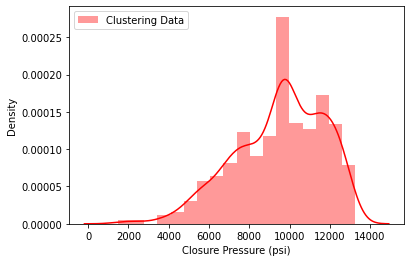

In [7]:
sns.distplot(df['Closure Pressure (psi)'],label='Clustering Data',norm_hist=True, color='r')
plt.legend()
# plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


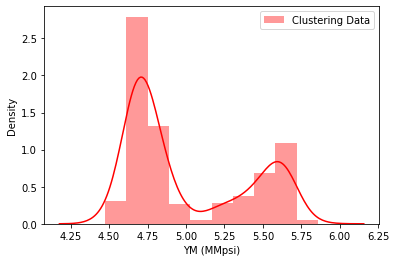

In [8]:
sns.distplot(df['YM (MMpsi)'],label='Clustering Data',norm_hist=True, color='r')
plt.legend()
# plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


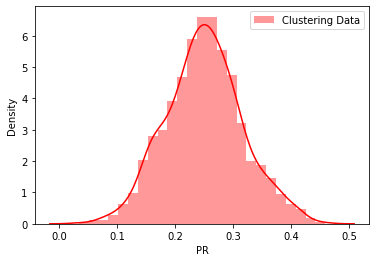

In [9]:
sns.distplot(df['PR'],label='Clustering Data',norm_hist=True, color='r')
plt.legend()
plt.show()

In [10]:
A=list(df.columns)
print(A)

['Closure Pressure (psi)', 'YM (MMpsi)', 'PR']


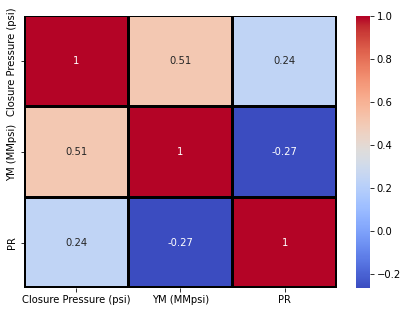

In [11]:
fig=plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidths=2,linecolor='black')

In [12]:
df.columns

Index(['Closure Pressure (psi)', 'YM (MMpsi)', 'PR'], dtype='object')

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit(df)
df_scaled=scaler.transform(df)
df_scaled

array([[ 0.86891975, -0.64662441,  1.80556814],
       [ 0.576779  , -0.64434448,  1.56568504],
       [ 0.98659747, -0.67147565,  1.47020246],
       ...,
       [-0.98187174, -0.88190785,  0.25321532],
       [-0.73060387, -0.88188999,  0.11674766],
       [-0.85179379, -0.88187031, -0.02933039]])

In [14]:
from sklearn.neighbors import NearestNeighbors
Neighbors = NearestNeighbors(n_neighbors=6)
nbrs = Neighbors.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

Text(0, 0.5, '6th NN distance')

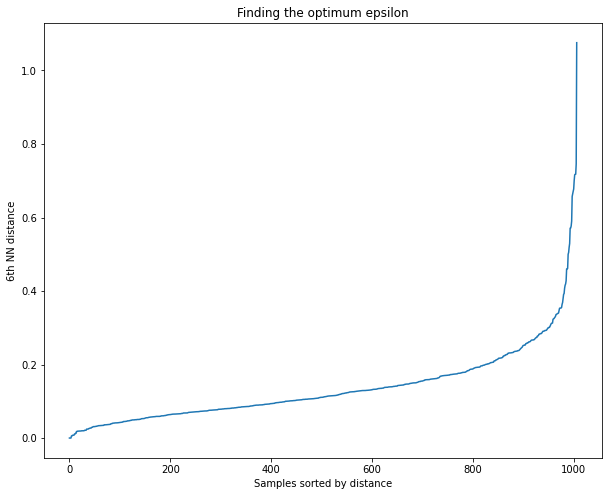

In [15]:
fig=plt.figure(figsize=(10,8))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('Finding the optimum epsilon')
plt.xlabel('Samples sorted by distance')
plt.ylabel('6th NN distance')

In [16]:
from sklearn.cluster import DBSCAN
Clustering= DBSCAN(eps=0.3,min_samples=6, metric='euclidean')

DB= Clustering.fit_predict(df_scaled)
DB

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
labels=Clustering.labels_
labels

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
labels=pd.DataFrame(DB,columns=['clusters'])
labels.to_csv('Blind_Output.csv')
labels

,clusters
0,0
1,0
2,0
3,0
4,0
...,...
1002,-1
1003,0
1004,0
1005,0


In [19]:
df.columns

Index(['Closure Pressure (psi)', 'YM (MMpsi)', 'PR'], dtype='object')

In [20]:
df_scaled

array([[ 0.86891975, -0.64662441,  1.80556814],
       [ 0.576779  , -0.64434448,  1.56568504],
       [ 0.98659747, -0.67147565,  1.47020246],
       ...,
       [-0.98187174, -0.88190785,  0.25321532],
       [-0.73060387, -0.88188999,  0.11674766],
       [-0.85179379, -0.88187031, -0.02933039]])

In [21]:
df_scaled= pd.DataFrame(df_scaled,columns=df.columns[0:3])
df_scaled['clusters']=DB
df_scaled

,Closure Pressure (psi),YM (MMpsi),PR,clusters
0,0.868920,-0.646624,1.805568,0
1,0.576779,-0.644344,1.565685,0
2,0.986597,-0.671476,1.470202,0
3,0.578261,-0.645142,1.751212,0
4,0.197986,-0.628157,0.082645,0
...,...,...,...,...
1002,0.028508,-0.108789,2.203446,-1
1003,-0.821100,-0.881849,0.251293,0
1004,-0.981872,-0.881908,0.253215,0
1005,-0.730604,-0.881890,0.116748,0


In [22]:
df_scaled['Closure Pressure (psi)']=(df_scaled['Closure Pressure (psi)']*(df['Closure Pressure (psi)'].std())+df['Closure Pressure (psi)'].mean())
df_scaled['YM (MMpsi)']=(df_scaled['YM (MMpsi)']*(df['YM (MMpsi)'].std())+df['YM (MMpsi)'].mean())
df_scaled['PR']=(df_scaled['PR']*(df['PR'].std())+df['PR'].mean())

In [23]:
df_scaled

,Closure Pressure (psi),YM (MMpsi),PR,clusters
0,11422.735402,4.744258,0.369194,0
1,10776.289786,4.745160,0.353358,0
2,11683.131257,4.734429,0.347055,0
3,10779.568195,4.744844,0.365606,0
4,9938.100722,4.751562,0.255456,0
...,...,...,...,...
1002,9563.082172,4.956974,0.395460,-1
1003,7683.079597,4.651226,0.266589,0
1004,7327.325780,4.651203,0.266716,0
1005,7883.328358,4.651210,0.257707,0


In [24]:
Group_by_mean=df_scaled.groupby(by='clusters').mean()
Group_by_mean

,Closure Pressure (psi),YM (MMpsi),PR
clusters,,,
-1,8559.325853,5.093442,0.251312
0,9103.763751,4.721670,0.269255
1,9923.806912,4.698112,0.379960
2,8606.155092,5.569215,0.193501
3,11175.672378,5.502061,0.244701
4,6054.320378,4.748625,0.088967
5,4656.636445,4.632924,0.140017
6,9868.815507,4.483571,0.268379
7,12062.134910,5.625208,0.159870


In [25]:
Group_by_count=df_scaled.groupby(by='clusters').count()
Group_by_count

,Closure Pressure (psi),YM (MMpsi),PR
clusters,,,
-1,171,171,171
0,534,534,534
1,6,6,6
2,19,19,19
3,175,175,175
4,6,6,6
5,16,16,16
6,6,6,6
7,74,74,74
